In [95]:
import sys
from pathlib import Path
import importlib

ROOT = Path.cwd().parent
sys.path.append(str(ROOT))

import src.topic_modeling as mod

importlib.reload(mod)

import pandas as pd
from src.topic_modeling import (
    print_topics, make_topic_labels, topic_top_words, strip_reddit_preview,
    nmf_topics
)

In [8]:
import sqlite3

PROCESSED_DIR = Path(ROOT) / "data" / "processed"
DB_CLEANED_PATH = PROCESSED_DIR / "sims4_cleaned.db"

print("DB path:", DB_CLEANED_PATH)
print("Exists?", DB_CLEANED_PATH.exists())

conn = sqlite3.connect(DB_CLEANED_PATH)

df_posts = pd.read_sql_query("SELECT * FROM posts", conn)
display(df_posts.head(5))

df_comments = pd.read_sql_query("SELECT * FROM comments", conn)
display(df_comments.head(5))

DB path: /Users/baderrezek/Desktop/Projects/Personal/sims4-sentiment-analysis/data/processed/sims4_cleaned.db
Exists? True


,post_id,created_utc,date,author,title,body,score,num_comments,permalink,subreddit,...,title_clean,body_clean,title_tokens,body_tokens,sentiment_body,sentiment_title,sentiment_post,sentiment_body_label,sentiment_title_label,sentiment_post_label
0,1mqbu8g,1755202474,2025-08-14 20:14:34+00:00,the-rain-witch,the cat is under the covers with her are you k...,,17469,182,https://reddit.com/r/Sims4/comments/1mqbu8g/th...,Sims4,...,cat cover kid,,cat cover kid,,0.0000,-0.4019,-0.20095,neutral,negative,negative
1,1mv3jnz,1755659387,2025-08-20 03:09:47+00:00,LPhamster,Welp. My 3 year old turned off my computer. Lo...,I finished making another cake house and I lov...,14991,244,https://reddit.com/r/Sims4/comments/1mv3jnz/we...,Sims4,...,welp 3 year old turn computer lose build look ...,finish make another cake house love forgot cli...,welp 3 year old turn computer lose build look ...,finish make another cake house love forgot cli...,0.9551,0.5187,0.73690,positive,positive,positive
2,1mtxbiy,1755548444,2025-08-18 20:20:44+00:00,NewInitiative9498,I love everything about this ridiculously big ...,I was about to sit my male Sim at the computer...,12864,191,https://reddit.com/r/Sims4/comments/1mtxbiy/i_...,Sims4,...,love everything ridiculously big dress,sit male sim computer busy notice wife get sho...,love everything ridiculously big dress,sit male sim computer busy notice wife get sho...,0.9461,0.7567,0.85140,positive,positive,positive
3,1n2l1np,1756407664,2025-08-28 19:01:04+00:00,LPhamster,Does this look like a strawberry roll shortcak...,I want to continue my streak of making little ...,12458,208,https://reddit.com/r/Sims4/comments/1n2l1np/do...,Sims4,...,look like strawberry roll shortcake house,want continue streak make little pastry house ...,look like strawberry roll shortcake house,want continue streak make little pastry house ...,0.6648,0.3612,0.51300,positive,positive,positive
4,1mn9ghp,1754908561,2025-08-11 10:36:01+00:00,VanessaCardui93,I got tired of tracking down fruits and veg so...,Apart from a few debug items everything is hom...,11948,582,https://reddit.com/r/Sims4/comments/1mn9ghp/i_...,Sims4,...,get tired track fruit veg make farmer market,apart debug item everything homegrown sim home...,get tired track fruit veg make farmer market,apart debug item everything homegrown sim home...,-0.4129,-0.4404,-0.42665,negative,negative,negative


,comment_id,post_id,subreddit,created_utc,date,author,body,score,parent_permalink,body_clean,body_tokens,sentiment,comment_sentiment_label
0,fz1sdeb,hwoao3,None,1595557766,2020-07-24 02:29:26+00:00,vukette,Okay now can we bring back bonehilda for plumb...,1370,https://reddit.com/r/thesims/comments/hwoao3/t...,okay bring back bonehilda plumbella plz,okay bring back bonehilda plumbella plz,0.2960,positive
1,fz0vjeu,hwoao3,None,1595540042,2020-07-23 21:34:02+00:00,akerwoods,Justice for cowplants finally,495,https://reddit.com/r/thesims/comments/hwoao3/t...,justice cowplant finally,justice cowplant finally,0.5267,positive
2,fz0yakx,hwoao3,None,1595541400,2020-07-23 21:56:40+00:00,catdadsimmer,this is literally one of the cutest and wholes...,616,https://reddit.com/r/thesims/comments/hwoao3/t...,literally one cut wholesome moment sim,literally one cut wholesome moment sim,0.5859,positive
3,fz16el9,hwoao3,None,1595545544,2020-07-23 23:05:44+00:00,yoop1001,aww i'm so happy for kelly 💗,351,https://reddit.com/r/thesims/comments/hwoao3/t...,aww happy kelly,aww happy kelly,0.8920,positive
4,fz182vo,hwoao3,None,1595546413,2020-07-23 23:20:13+00:00,taikodragonqueen,Seeing her joy at this was so very much wholes...,251,https://reddit.com/r/thesims/comments/hwoao3/t...,see joy much wholesome good bean,see joy much wholesome good bean,0.7717,positive


In [9]:
# create a new full post column that combines the title and body
df_posts["full_post"] = df_posts["title"] + " " + df_posts["body"]

In [37]:
# Create the column I want to run the model on
texts = df_posts["full_post"].dropna().map(strip_reddit_preview).tolist()

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF

stop_words = set(ENGLISH_STOP_WORDS)

important_words = {"pack", "packs", "expansion", "dlc",
                   "bug", "bugs", "glitch", "patch", "update", "crash", 
                   "error", "issue", "fix", "ea", "broken", "lag", "laggy",
                   "overpriced", "expensive", "annoying", "angry", "hate",
                   "kits", "consumerism", "help", "game"}

extra = {
    "lol","don","didn","doesn","cant","wont","isnt","arent","shouldnt","couldnt","wouldnt",
    "ve","ll","im","ya","u", "legacy", "love", "pregnant"
    "just","know","got","time","really","like","look","make","made","way","people","things","thing",
    "play","playing","think","feel","feels","does", "base"
}

stop_words = list((ENGLISH_STOP_WORDS - important_words) | extra)

# TF-IDF to weight important words
vectorizer = TfidfVectorizer(
    max_df=0.9,          # ignore very common words
    min_df=50,           # require words to appear at least 30 times
    stop_words=stop_words,
    ngram_range=(1,2),   # allow bigrams too ("error code", "expansion pack")
    max_features=40000   # cap vocab size for efficiency
)
X = vectorizer.fit_transform(texts)

# NMF with 10 topics
nmf = NMF(n_components=10, random_state=42, init="nndsvda", max_iter=400)
W = nmf.fit_transform(X)  # doc-topic matrix
H = nmf.components_       # topic-word matrix

# inspect top words
words = vectorizer.get_feature_names_out()

print_topics(H, words)

Topic 1: sims years sims game played male games favorite making community post best giving world random mod different wedding need ea friends
Topic 2: sim pregnant died child created vampire teen date male ghost lmao husband relationship left gave came meet happened cute right
Topic 3: game sims game mods update tried years ea load updated screen today save let household fix broken 10 packs different isn
Topic 4: just wanted started happened actually normal mods literally dog mod oh aged died mean guess sure household right stop tell
Topic 5: house build built room building gallery stop id home inspired floor tried old lot small big challenge houses finished gallery id
Topic 6: new pack update expansion save expansion pack start build grim world excited ea help hair household nature packs outfits cas favorite
Topic 7: did finally cat tried check little skill ea today goth remember yes guys seen times buy kids hope went said
Topic 8: family life want lot home little work making save tho

In [85]:
top_words = topic_top_words(H, words, n=8)

topic_labels = make_topic_labels(top_words, max_words=3)

for t, lab in topic_labels.items():
    print(f"Topic {t}: {lab}")

Topic 1: sims / years / sims game
Topic 2: sim / pregnant / died
Topic 3: game / sims game / mods
Topic 4: just / wanted / started
Topic 5: house / build / built
Topic 6: new / pack / update
Topic 7: did / finally / cat
Topic 8: family / life / want
Topic 9: cc / mods / mod
Topic 10: baby / pregnant / grim


In [90]:
df_posts["topic"] = W.argmax(axis=1)

# assign topic labels
df_posts["topic_label"] = df_posts["topic"].map(topic_labels)

In [94]:
df_posts.groupby("topic_label")["sentiment_post"].mean().sort_values()

topic_label
cc / mods / mod             0.002970
sims / years / sims game    0.072482
game / sims game / mods     0.078398
family / life / want        0.104153
sim / pregnant / died       0.104406
new / pack / update         0.116978
just / wanted / started     0.122118
did / finally / cat         0.125281
house / build / built       0.163954
Name: sentiment_post, dtype: float64

In [44]:
# each row: doc-topic distribution
df_posts["year"] = pd.to_datetime(df_posts["date"], errors="coerce", utc=True).dt.year

topic_df = pd.DataFrame(W, columns=[f"topic_{i}" for i in range(W.shape[1])])
topic_df["year"] = df_posts["year"].values

# sum weights per year
year_topic_sum = topic_df.groupby("year").sum()

# convert to proportions (row-normalize)
year_topic_prop = year_topic_sum.div(year_topic_sum.sum(axis=1), axis=0)

year_topic_prop.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
year,,,,,,,,,,
2018,0.096064,0.295241,0.017560,0.243977,0.079229,0.003463,0.000565,0.004000,0.259900,0.000000
2019,0.222559,0.149225,0.082527,0.083798,0.047503,0.030253,0.090325,0.008044,0.230280,0.055486
2020,0.191010,0.120808,0.077021,0.109644,0.086883,0.056982,0.074347,0.037439,0.171908,0.073957
2021,0.213180,0.138199,0.105105,0.083875,0.062205,0.090478,0.028853,0.042477,0.179059,0.056570
2022,0.238361,0.122774,0.100926,0.060116,0.065327,0.045413,0.056974,0.064209,0.167926,0.077975


In [45]:
# weight topic contributions by score
weights = df_posts["score"].clip(lower=1).fillna(1).values
topic_weighted = W * weights[:, None]

topic_weighted_df = pd.DataFrame(topic_weighted, columns=[f"topic_{i}" for i in range(W.shape[1])])
topic_weighted_df["year"] = df_posts["year"].values

year_topic_score = topic_weighted_df.groupby("year").sum()

# proportions by year (so high-score topics pop out)
year_topic_score_prop = year_topic_score.div(year_topic_score.sum(axis=1), axis=0)

/var/folders/lm/ys_sx7js1r7dvcyd25q3x9z80000gn/T/ipykernel_47786/3576294281.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', 10).colors


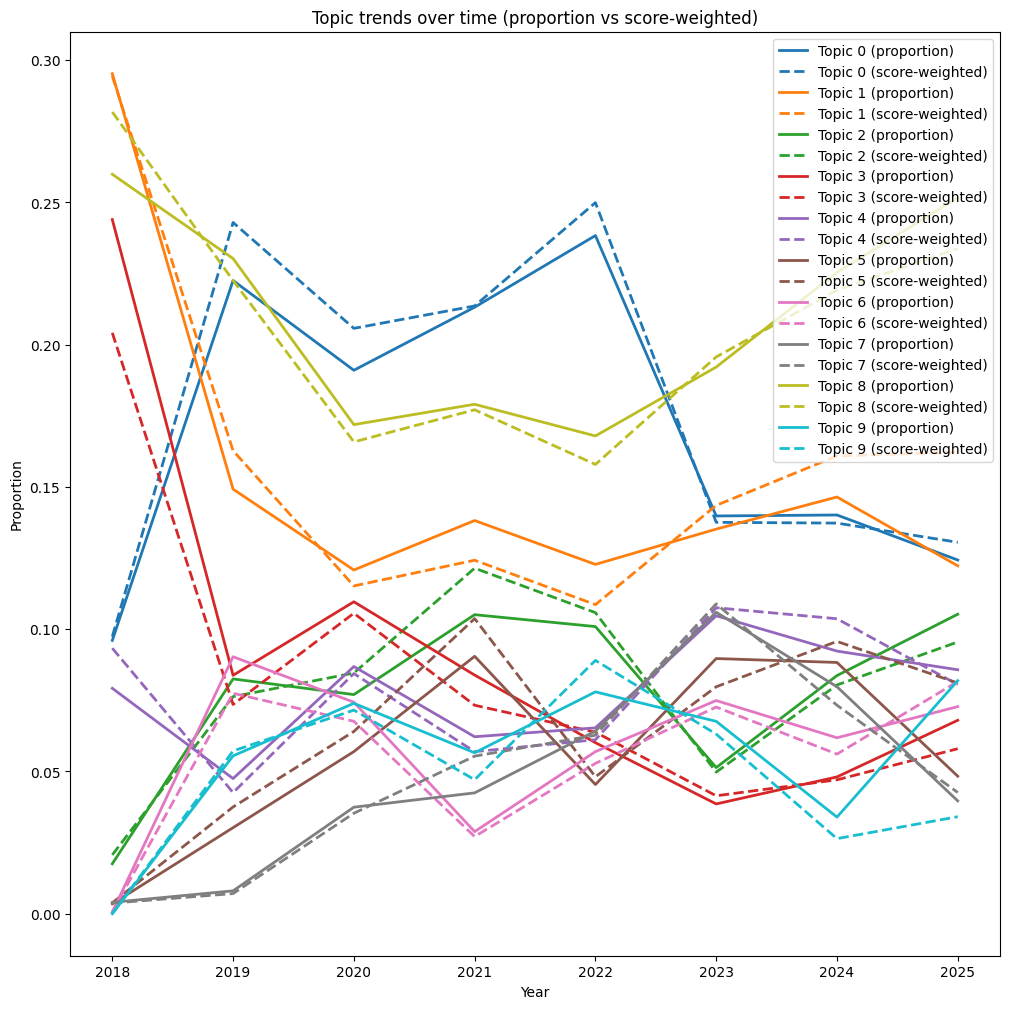

In [50]:
colors = plt.cm.get_cmap('tab10', 10).colors
topic_ids = [0, 1, 2, 3, 4, 5, 6, 7, 8 ,9]  # for example

fig, ax = plt.subplots(figsize=(12,12))

for t, c in zip(topic_ids, colors):
    ax.plot(year_topic_prop.index, year_topic_prop[f"topic_{t}"], 
            label=f"Topic {t} (proportion)", color=c, linewidth=2)
    ax.plot(year_topic_score_prop.index, year_topic_score_prop[f"topic_{t}"], 
            label=f"Topic {t} (score-weighted)", color=c, linestyle="--", linewidth=2)

ax.set_title("Topic trends over time (proportion vs score-weighted)")
ax.set_ylabel("Proportion")
ax.set_xlabel("Year")
ax.legend()
plt.show()